In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


/home/feodor/Jupyter/jupyter-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import networkx as nx

from src.depth import DepthPoset, get_ordered_border_matrix_from_matrix_of_heights

from matplotlib import pyplot as plt

# Test geting border matrix method

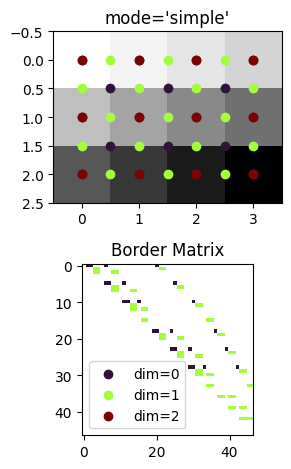

In [3]:
shape = (3, 4)
heights = np.linspace(0, 1, np.prod(shape)).reshape(shape)


modes = ['simple']

fig, axs = plt.subplots(2, len(modes), squeeze=False)

for i, mode in enumerate(modes):
    axs[0, i].set_title(f'mode={mode.__repr__()}')
    axs[0, i].imshow(heights, cmap='Greys')

    cmap = plt.get_cmap('turbo')
    
    try:
        sources, matrix, dims, filtration = get_ordered_border_matrix_from_matrix_of_heights(heights, mode=mode)
        
        matrix = matrix.astype(float)
        matrix[matrix == 0] = np.nan
        matrix *= dims.reshape(-1, 1)

        for dim in np.unique(dims):
            y, x = np.array(list(sources[dims == dim])).mean(axis=1).transpose()
            axs[0, i].scatter(x, y, label=f'dim={dim}', color=cmap(dim/matrix.ndim))
        #axs[0, i].legend()
        handles, labels = axs[0, i].get_legend_handles_labels()
        
        axs[1, i].set_title(f'Border Matrix')
        axs[1, i].imshow(matrix, vmin=0, vmax=heights.ndim, cmap=cmap)
        axs[1, i].legend(handles, labels, loc='lower left')
    except Exception as err:
        axs[1, i].set_title(err)
        axs[1, i].set_xticks([])
        axs[1, i].set_yticks([])

plt.tight_layout()
plt.show()

# 1-dimensional Random Walk

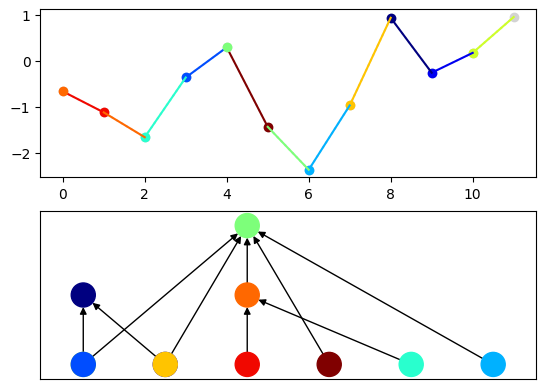

In [8]:
nsteps = 12
steps = np.random.normal(size=nsteps)
walk = np.cumsum(steps)

sources, matrix, dims, filter_values = get_ordered_border_matrix_from_matrix_of_heights(walk)
dp = DepthPoset.from_border_matrix(matrix.astype(int), dims=dims, filter_values=filter_values, sources=sources)

node_colors = np.linspace(0, 1, len(dp.nodes))
node_colors = np.random.choice(node_colors, len(dp.nodes), replace=False)
node_colors = plt.get_cmap('jet')(node_colors)


fig, axs = plt.subplots(2)

axs[0].plot(walk, marker='o', color='lightgrey', linestyle=':', zorder=0)
for inode, node in enumerate(dp.nodes):
    simplex1, simplex0 = node.source
    simplex1 = list(simplex1)
    x0, y0 = simplex0, walk[simplex0]
    x1, y1 = simplex1, walk[simplex1]
    axs[0].scatter(x0, y0, color=node_colors[inode], zorder=1)
    axs[0].plot(x1, y1, color=node_colors[inode], zorder=1)

nx.draw_networkx(dp.get_transitive_reduction(), pos=dp.hasse_layout(), node_color=node_colors, ax=axs[1], with_labels=False)
plt.show()

The questions, which are interesting to answer:
1. Verify the proportion of shallow pair to all pairs increasing the length of the random walk


In [ ]:
pass

# 2-dimensional Random Walk

19 19


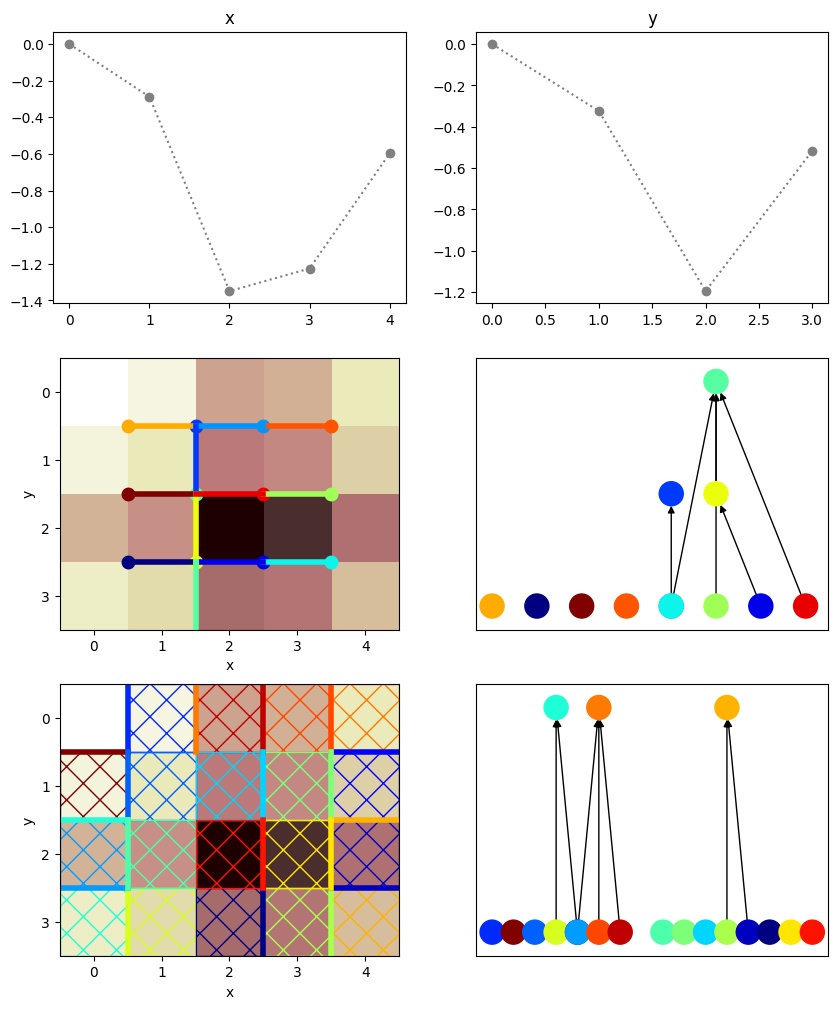

In [7]:
nsteps0 = 5
nsteps1 = 4

steps0 = np.random.normal(size=nsteps0)
steps1 = np.random.normal(size=nsteps1)
walk0 = np.cumsum(steps0)
walk1 = np.cumsum(steps1)
walk0 -= walk0[0]
walk1 -= walk1[0]
walk = walk0.reshape(1, -1) + walk1.reshape(-1, 1)

sources, matrix, dims, filter_values = get_ordered_border_matrix_from_matrix_of_heights(walk)
dp = DepthPoset.from_border_matrix(matrix.astype(int), dims=dims, filter_values=filter_values, sources=sources)


fig, axs = plt.subplots(3, 2, figsize=(10, 12), squeeze=False)
axs[0, 0].set_title(f'x')
axs[0, 0].plot(walk0, marker='o', color='grey', linestyle=':', zorder=0)
axs[0, 1].set_title(f'y')
axs[0, 1].plot(walk1, marker='o', color='grey', linestyle=':', zorder=0)

for i in [1, 2]:
    axs[i, 0].imshow(walk, cmap='pink')
    axs[i, 0].set_xticks(np.intersect1d(axs[i, 0].get_xticks(), np.arange(nsteps0)))
    axs[i, 0].set_yticks(np.intersect1d(axs[i, 0].get_yticks(), np.arange(nsteps1)))
    axs[i, 0].set_xlabel('x')
    axs[i, 0].set_ylabel('y')

dp0 = dp.subposet_dim(0)
node_colors0 = np.linspace(0, 1, len(dp0.nodes))
node_colors0 = np.random.choice(node_colors0, len(dp0.nodes), replace=False)
node_colors0 = plt.get_cmap('jet')(node_colors0)


def get_1dcell(c0, c1):
    # 
    center = np.mean([c0, c1], axis=0)
    if center[0] == int(center[0]):
        res = np.array([[-0.5, 0], [+0.5, 0]]) + center
    else:
        res = np.array([[0, -0.5], [0, +0.5]]) + center
    x, y = res.transpose()
    return x, y

for inode, node in enumerate(dp0.nodes):
    color = node_colors0[inode]
    simplex0, simplex1 = node.source
    y0, x0 = np.mean(simplex0, axis=0)
    axs[1, 0].scatter(x0, y0, color=color, linewidth=4)
    y1, x1 = get_1dcell(*simplex1)
    axs[1, 0].plot(x1, y1, color=color, linewidth=4)
    

nx.draw_networkx(dp0.get_transitive_reduction(), pos=dp0.hasse_layout(), node_color=node_colors0, ax=axs[1, 1], with_labels=False)


dp1 = dp.subposet_dim(1)
node_colors1 = np.linspace(0, 1, len(dp1.nodes))
node_colors1 = np.random.choice(node_colors1, len(dp1.nodes), replace=False)
node_colors1 = plt.get_cmap('jet')(node_colors1)

print(len(node_colors1), len(dp1.nodes))

for inode, node in enumerate(dp1.nodes):
    color = node_colors1[inode]
    simplex0, simplex1 = node.source
    y0, x0 = get_1dcell(*simplex0)
    axs[2, 0].plot(x0, y0, color=color, linewidth=4)
    
    axs[2, 0].fill_between(simplex1[0][1] + np.array([-0.5, 0.5]), 
                           simplex1[0][0] - 0.5*np.ones(2), 
                           simplex1[0][0] + 0.5*np.ones(2), 
                           facecolor='none', hatch='x', edgecolor=color
                           )

nx.draw_networkx(dp1.get_transitive_reduction(), pos=dp1.hasse_layout(), node_color=node_colors1, ax=axs[2, 1], with_labels=False)


plt.show()